<a href="https://colab.research.google.com/github/Mars0414/my_project/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22covid%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Анализ данных


##ГИПОТЕЗЫ:

* Страны, которые раньше ввели карантинные меры, показывают меньшие темпы
прироста заражений.
* В странах с большей долей пожилого населения выше смертность
* В Кыргызстане более низкий уровень смертности по сравнению со странами с похожим числом заражения
* В Кыргызстане фиксируются всплески заражений после крупных праздников или массовых мероприятий.
* День когда было зарегистрировано максимальное количество новых случаев за всё время.


## Анализ:

* Подготовка и очистка
* Проверка пропущенных значений, типов данных
* Приведение процентов к числовым типам
* Добавление новых признаков
mortality_rate = Deaths / Confirmed
recovery_rate = Recovered / Confirmed
cases_per_million = TotalCases / Population
tests_per_case = TotalTests / TotalCases
death_per_million = TotalDeaths / Population

## Анализ по странам:

* Топ-10 стран по приросту, смертности и тестированию
* Как связаны: Confirmed -> Deaths, Confirmed -> Tests, Population -> Cases
* Выявление факторов, влияющих на смертность


#Анализ country_wise_latest.csv:
	•	Топ стран по заражениям, смертям
	•	Летальность, восстановление по регионам
	•	Сравнение с прошлыми неделями
#Анализ day_wise.csv:
	•	Глобальные тренды: подтверждённые, активные, выздоровления, смерти
	•	Ежедневные приросты
	•	Смертность, выздоровление


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, ttest_ind, kruskal
from bs4 import BeautifulSoup
import requests
from google.colab import files, drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# country_wise_latest

In [ ]:
country_df = pd.read_csv("country_wise_latest.csv")
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

Пропущенных значений нет — данные полные.
Типы данных:
Все числовые поля имеют тип int64 или float64.
Страны и регион ВОЗ — object.

* Топ стран по заражениям и смертям
Для этого мы используем столбцы:

Confirmed — количество подтверждённых случаев

Deaths — количество смертей

Country/Region — название страны

Мы отсортируем таблицу по этим колонкам, чтобы найти страны с наибольшими значениями.

Топ-10 стран по заражениям:

<ipython-input-7-94ca81bcfc56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_confirmed, y='Country/Region', x='Confirmed', palette='Reds_r')


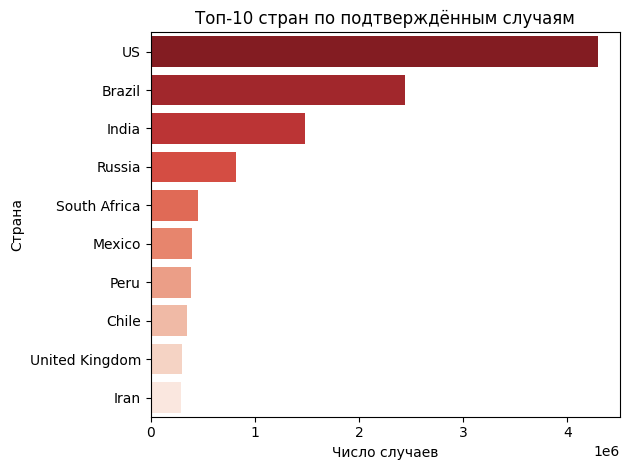

In [ ]:
top_confirmed = country_df.sort_values('Confirmed', ascending=False).head(10)
sns.barplot(data=top_confirmed, y='Country/Region', x='Confirmed', palette='Reds_r')
plt.title('Топ-10 стран по подтверждённым случаям')
plt.xlabel('Число случаев')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


Топ-10 стран по смертям:

<ipython-input-15-2b79c1e4110f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_deaths, y='Country/Region', x='Deaths', palette='Greys_r')


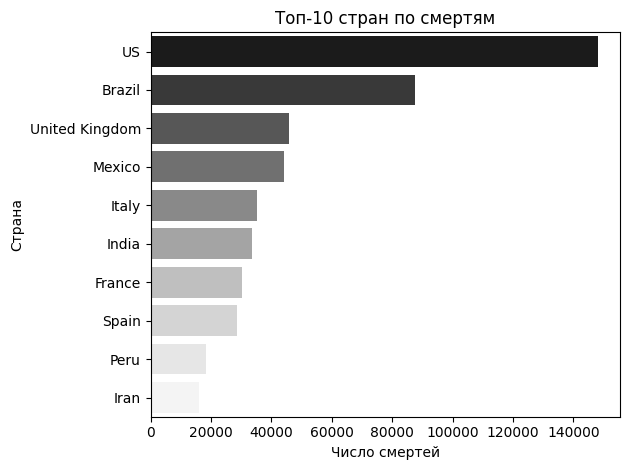

In [ ]:
top_deaths = country_df.sort_values('Deaths', ascending=False).head(10)
sns.barplot(data=top_deaths, y='Country/Region', x='Deaths', palette='Greys_r')
plt.title('Топ-10 стран по смертям')
plt.xlabel('Число смертей')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()

Летальность и восстановление по регионам
Мы будем использовать:

Deaths / 100 Cases — летальность в %

Recovered / 100 Cases — процент выздоровлений

Country/Region — страна

<ipython-input-14-e280f29b36d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fatality, y='Country/Region', x='Deaths / 100 Cases', palette='Reds')


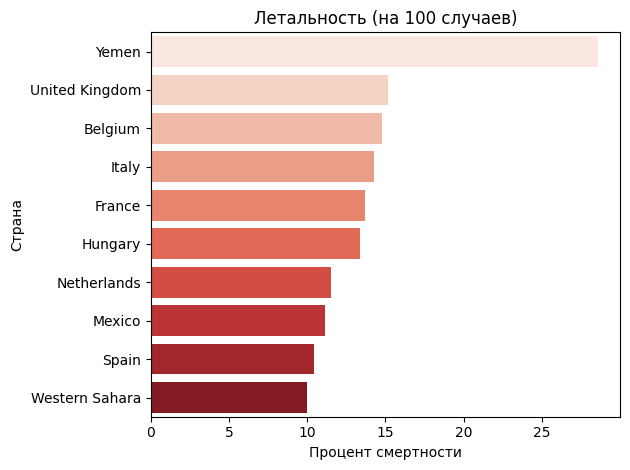

In [ ]:
top_fatality = country_df.sort_values('Deaths / 100 Cases', ascending=False).head(10)
sns.barplot(data=top_fatality, y='Country/Region', x='Deaths / 100 Cases', palette='Reds')
plt.title('Летальность (на 100 случаев)')
plt.xlabel('Процент смертности')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


Восстановление

<ipython-input-13-63c12b326e9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_recovery, y='Country/Region', x='Recovered / 100 Cases', palette='Greens')


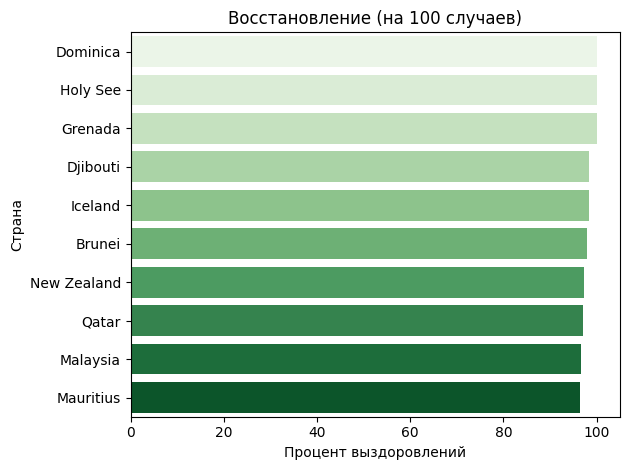

In [ ]:
top_recovery = country_df.sort_values('Recovered / 100 Cases', ascending=False).head(10)
sns.barplot(data=top_recovery, y='Country/Region', x='Recovered / 100 Cases', palette='Greens')
plt.title('Восстановление (на 100 случаев)')
plt.xlabel('Процент выздоровлений')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


Сравнение с прошлыми неделями
Для этого используется столбец:

1 week % increase — недельный прирост подтверждённых случаев

<ipython-input-12-1d2cb39b5253>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, y='Country/Region', x='1 week % increase', palette='coolwarm')


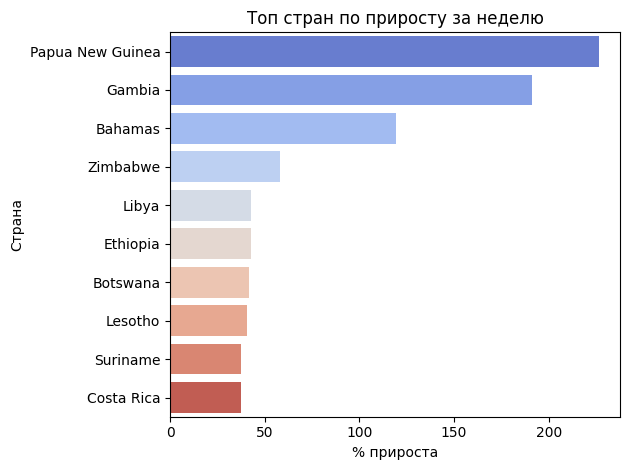

In [ ]:
top_growth = country_df.sort_values('1 week % increase', ascending=False).head(10)
sns.barplot(data=top_growth, y='Country/Region', x='1 week % increase', palette='coolwarm')
plt.title('Топ стран по приросту за неделю')
plt.xlabel('% прироста')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


<ipython-input-11-5c3b188c6182>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_deaths, x='Deaths', y='Country/Region', palette='Reds_r')
<ipython-input-11-5c3b188c6182>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_confirmed, x='Confirmed', y='Country/Region', palette='Blues_r')
<ipython-input-11-5c3b188c6182>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_recovered, x='Recovered', y='Country/Region', palette='Greens_r')


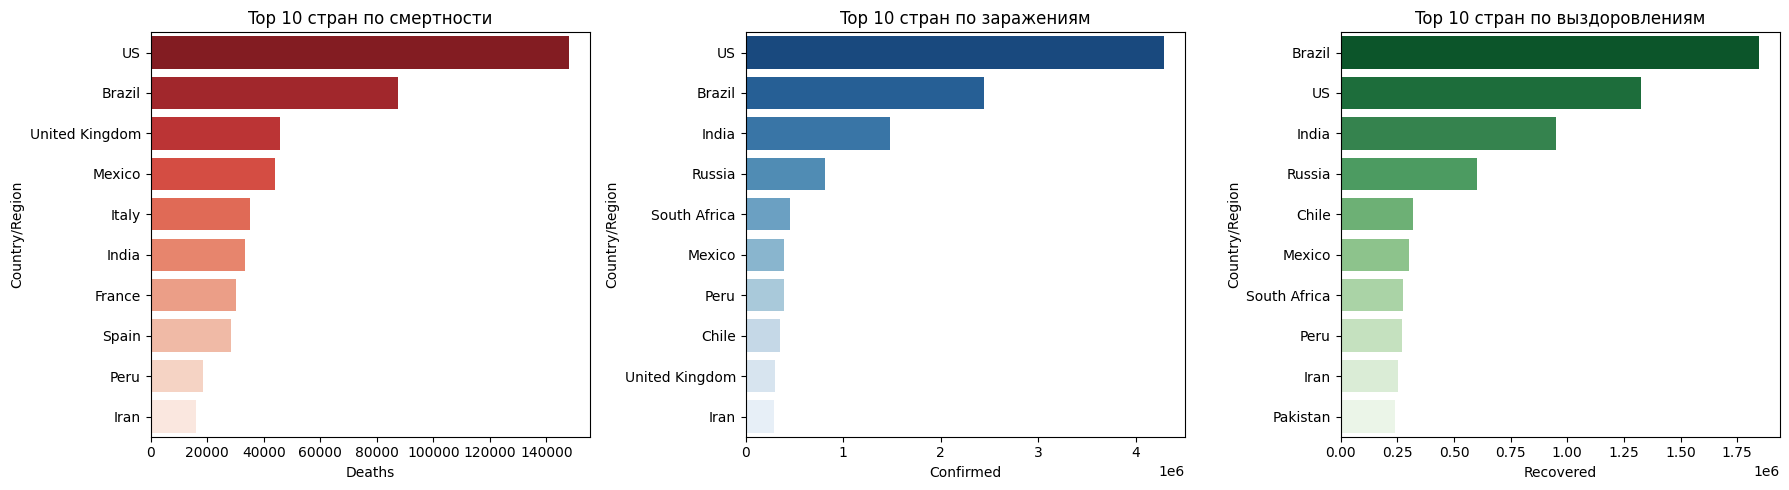

In [ ]:
top10_deaths = df.nlargest(10, 'Deaths')
top10_confirmed = df.nlargest(10, 'Confirmed')
top10_recovered = df.nlargest(10, 'Recovered')
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=top10_deaths, x='Deaths', y='Country/Region', palette='Reds_r')
plt.title('Top 10 стран по смертности')
plt.subplot(1, 3, 2)
sns.barplot(data=top10_confirmed, x='Confirmed', y='Country/Region', palette='Blues_r')
plt.title('Top 10 стран по заражениям')
plt.subplot(1, 3, 3)
sns.barplot(data=top10_recovered, x='Recovered', y='Country/Region', palette='Greens_r')
plt.title('Top 10 стран по выздоровлениям')

plt.tight_layout()
plt.show()





# day_wise

In [ ]:
df_day = pd.read_csv("day_wise.csv")
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


# full_grouped

In [ ]:
df_full = pd.read_csv("/content/full_grouped.csv")
df_full.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
df_full.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


# worldometer_data